# Iniciando a análise

Vamos usar Pandas e Seaborn

https://pandas.pydata.org/docs/


https://seaborn.pydata.org/

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
df.shape

(8807, 12)

In [10]:
linhas = df.shape[0]
colunas = df.shape[1]

print(f'Esta base de dados possui {linhas} linhas e {colunas} colunas')

Esta base de dados possui 8807 linhas e 12 colunas


In [15]:
df.columns

Index(['id_programa', 'serie_filme', 'titulo', 'diretor', 'elenco', 'pais',
       'adicionado_na_netflix', 'ano_de_lancamento', 'avaliacao', 'duracao',
       'classificacao', 'descricao'],
      dtype='object')

In [12]:
renomear = {
    'show_id':'id_programa', 
    'type':'serie_filme', 
    'title':'titulo', 
    'director':'diretor', 
    'cast':'elenco', 
    'country':'pais', 
    'date_added':'adicionado_na_netflix',
    'release_year':'ano_de_lancamento', 
    'rating':'avaliacao', 
    'duration': 'duracao', 
    'listed_in':'classificacao', 
    'description':'descricao'
}

In [14]:
df = df.rename(columns=renomear)

In [16]:
df.serie_filme.unique()

array(['Movie', 'TV Show'], dtype=object)

In [17]:
serie_filme = {
    'Movie':'filme', 'TV Show':'serie'
}

df.serie_filme = df.serie_filme.map(serie_filme)

In [18]:
df.head(3)

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
0,s1,filme,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,serie,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,serie,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Quantos filmes e séries estão presentes na Netflix?

In [19]:
df.serie_filme.value_counts()

filme    6131
serie    2676
Name: serie_filme, dtype: int64

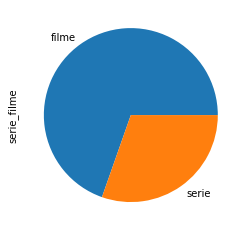

In [21]:
df['serie_filme'].value_counts().plot(kind='pie')

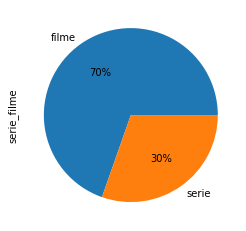

In [22]:
df['serie_filme'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Filmes nacionais

In [24]:
df.tail(2)

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
8805,s8806,filme,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,filme,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [25]:
df['pais'] == 'Brazil'

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: pais, Length: 8807, dtype: bool

In [27]:
df_br = df[df['pais'] == 'Brazil']

In [28]:
df_br.head(3)

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
302,s303,filme,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,filme,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,filme,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."


In [29]:
import seaborn as sns

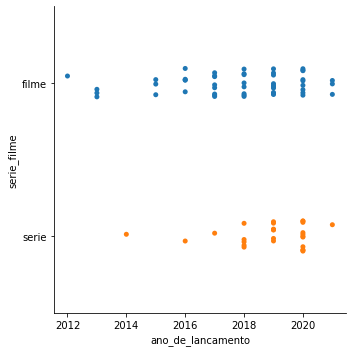

In [30]:
sns.catplot(x='ano_de_lancamento', y='serie_filme', data=df_br)

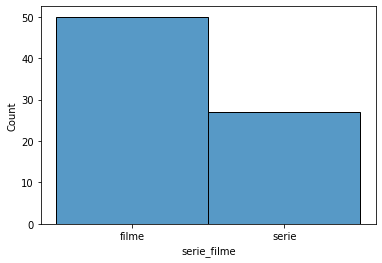

In [31]:
sns.histplot(data=df_br, x='serie_filme')

In [32]:
df_br['serie_filme'].value_counts()

filme    50
serie    27
Name: serie_filme, dtype: int64

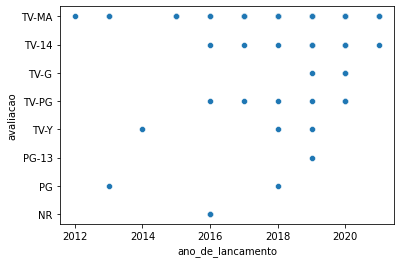

In [60]:
sns.scatterplot(x='ano_de_lancamento', y='avaliacao', data=df_br)

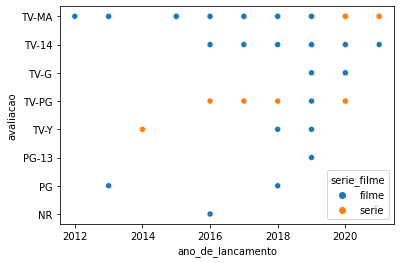

In [61]:
sns.scatterplot(x='ano_de_lancamento', y='avaliacao', hue='serie_filme',data=df_br)

In [33]:
df_br.head()

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
302,s303,filme,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,filme,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,filme,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
966,s967,filme,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
1188,s1189,filme,Get the Goat,Vitor Brandt,"Matheus Nachtergaele, Edmilson Filho, Letícia ...",Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...


In [35]:
df_br.loc[df_br['serie_filme'] == 'serie'].head()

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
1339,s1340,serie,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","After a family tragedy, a man discovers mythic..."
1532,s1533,serie,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,"December 16, 2020",2020,TV-MA,1 Season,"Docuseries, International TV Shows","In this intimate documentary, Brazilian pop qu..."
1715,s1716,serie,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
1771,s1772,serie,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,"October 31, 2020",2017,TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...
1910,s1911,serie,"Good Morning, Verônica",NaN,"Tainá Müller, Eduardo Moscovis, Camila Morgado...",Brazil,"October 1, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Mys...","While hunting for a dating-site predator, an u..."


In [36]:
df_br.loc[df_br['serie_filme'] == 'filme'].head()

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
302,s303,filme,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,filme,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,filme,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
966,s967,filme,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
1188,s1189,filme,Get the Goat,Vitor Brandt,"Matheus Nachtergaele, Edmilson Filho, Letícia ...",Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...


In [37]:
df_br.loc[df_br['serie_filme'] == 'filme'][['titulo', 'ano_de_lancamento']]

,titulo,ano_de_lancamento
302,City of God: 10 Years Later,2013
650,O Vendedor de Sonhos,2016
783,Carnaval,2021
966,Get the Grift,2021
1188,Get the Goat,2021
1403,Double Dad,2020
1577,Emicida: AmarElo - It’s All For Yesterday,2020
1601,Just Another Christmas,2020
1704,The Beginning of Life 2: Outside,2020
1798,Alice Junior,2019


In [39]:
df_br.loc[df_br['serie_filme'] == 'filme'][['titulo', 'ano_de_lancamento', 'elenco']].sort_values(['ano_de_lancamento'])

,titulo,ano_de_lancamento,elenco
4100,Buddies,2012,"Ariel Goldenberg, Rita Pokk, Breno Viola, Lima..."
302,City of God: 10 Years Later,2013,NaN
7818,Radical: the Controversial Saga of Dada Figuei...,2013,NaN
6366,Boy and the World,2013,"Vinícius Garcia, Felipe Zilse, Alê Abreu, Lu H..."
5765,Chatô: The King of Brazil,2015,"Marco Ricca, Andrea Beltrão, Letícia Sabatella..."
5589,Operações Especiais,2015,"Cleo Pires, Marcos Caruso, Thiago Martins, Fab..."
5588,Jonas,2015,"Jesuíta Barbosa, Laura Neiva, Criolo, Ana Cecí..."
650,O Vendedor de Sonhos,2016,"César Troncoso, Dan Stulbach, Thiago Mendonça,..."
8108,Stronger Than the World,2016,"José Loreto, Cleo Pires, Milhem Cortaz, Jackso..."
6207,Back and Forth,2016,"Ingrid Guimarães, Fábio Assunção, Alice Braga,..."


## Pesquisando sobre a Coréia na Netflix

In [42]:
df['pais'].value_counts()

United States                         2818
India                                  972
United Kingdom                         419
Japan                                  245
South Korea                            199
                                      ... 
Ireland, United States, France           1
Egypt, Denmark, Germany                  1
South Africa, United States, Japan       1
United States, Morocco                   1
India, Germany, Austria                  1
Name: pais, Length: 748, dtype: int64

In [45]:
df_k = df[(df['pais'] == 'South Korea')]

In [49]:
df_k.head(2)

,id_programa,serie_filme,titulo,diretor,elenco,pais,adicionado_na_netflix,ano_de_lancamento,avaliacao,duracao,classificacao,descricao
104,s105,serie,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,"September 6, 2021",2016,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...
124,s125,serie,Pororo - The Little Penguin,NaN,NaN,South Korea,"September 2, 2021",2013,TV-Y7,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."


In [50]:
df_k['serie_filme'].value_counts()

serie    158
filme     41
Name: serie_filme, dtype: int64

In [54]:
paises = df['pais'].value_counts()
len(paises.unique())

50

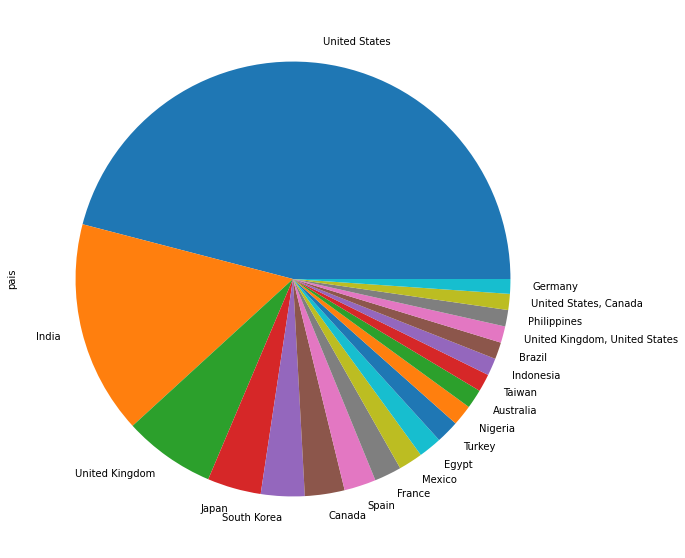

In [59]:
paises[:20].plot.pie(y=paises.value_counts(), figsize=(12, 10))